<a href="https://colab.research.google.com/github/onleey/Machine-Learning_demo/blob/master/608_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98_%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/001'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/001


- 분류의 평가방법은 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 정확도만 가지고 판단했다가는 잘못된 평가 결과게 빠질 수 있다.

- 0 또는 1, 긍정 또는 부정을 판단하는 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중요시 되는 경우가 많다.  

- 분류의 성능 평가 지표  
① 정확도(Accuracy)  
② 오차행렬(Confusion Matrix)  
③ 정밀도(Precision)  
④ 재현율(Recall)  
⑤ F1 스코어  
⑥ ROC AUC

### 1. 정확도 (Accuracy)  
$정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 건수 }{전체 예측데이터 건수}$

- 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다.  
- 하지만 이진 분류의 경우 데이터의 구성에 따라 ML모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.

단순히 Sex 피처가 1이면 0, 그렇지않으면 1로 예측하는 단순한 Classifier이다.

In [15]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):

  #fit()메소드는 아무것도 학습하지 않음
  def fit(self, X, y=None):
    pass

  #predict() 메소드는 단순히 sex Feature가 1이면 0, 그렇지않으면 1로 예측함
  def predict(self,X):
    pred = np.zeros((X.shape[0],1))

    for i in range(X.shape[0],1):
      if X ['Sex'].iloc[1] == 1:
        pred[i] = 0
      else:
        pred[i] = 1

    return pred

앞에 타이타닉 예시에서 했던 전처리와 동일하게 처리

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

정확도 측정

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./datasets/titanic/titanic/train.csv')
#print(titanic_df.head(3))


y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop ('Survived', axis = 1)
print(X_titanic_df.columns)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=0)

print('X_test:{}'.format(X_test.shape))
#직접구현한 Mydummyclassifier로 학습/에측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions= myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))





Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
X_test:(179, 11)
Dummy Classifier의 정확도는 : 0.6145


불균형한 이진 분류로 만들기 위해 숫자 '7'만 True 나머지 숫자는 False로 설정

- 마찬가지로 fit은 아무것도 하지 않음
- predict에서는 무조건 0을 반환함
- 모든 예측을 다 0으로 하는 것! (모두 7이 아닌 다른 숫자라고 예측)
- 당연히 모델로서 말이 안 되는데 이것의 정확도를 측정

In [24]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass

    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)




[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


정확도

In [36]:
print(digits.target)
# 숫자가 7인경우 True이고 나머지는 False이므로 이를 1과 0으로 변환하기 위해서 astype(int로)한것이다.
y= (digits.target == 7). astype(int)
print(y)

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

#MyFakeClassifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)


fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test, fakepred)))


cf= confusion_matrix(y_test, fakepred)
print('confusion_matrix')
print(cf)



[0 1 2 ... 8 9 8]
[0 0 0 ... 0 0 0]
0    1213
1     134
dtype: int64
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900
confusion_matrix
[[405   0]
 [ 45   0]]


- 모든 예측을 0으로 했지만, 0 (7이 아닌 숫자)이 1 (숫자 7)보다 훨씬 많은 불균형 데이터였기 때문에, 정확도가 무려 90%가 나왔다.

- 이렇게 두 가지 예제로 불균형 데이터에서 정확도의 성능 평가지표로서 한계를 보였다

### 2 오차행렬 = 오분류표=혼동행렬
- 이진 분류에서 성능 지표로 오차행렬(confusion matrix, 혼동 행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표이다.


![confusion](https://velog.velcdn.com/images/gangjoo/post/c6d9396b-15b1-4325-b429-50ca9fc3210c/image.png)


- TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
- FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
- FN은 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
- TP는 예측값을 Positive갑 1로 예측했는데 실제 값 역시 Positive 값 1


- False Positive는 1종 오류
- False Negative는 2종 오류

1종 오류와 2종 오류 중에서 어떤 것이 더 중요한지는, 의사결정자의 판단에 따라 다르다.


정확도(Accuracy) = 예측  결과와 실제 값이 동일한 건수 / 전체 데이터수 = (TN + TP ) / (TN + FP + FN + TP)

<Axes: >

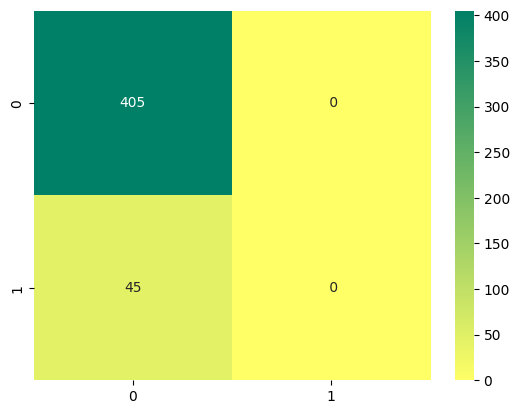

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, fakepred), annot=True, fmt='2.0f', cmap='summer_r')

정밀도(Precision) = TP  / (FP + TP)  
재현율(Recall) = TP / (FN + TP)  
재현율(Recall)=민감도(Sensitivity)=TPR(True Positive Rate)


- 불균형한 데이터 세트에서 정확도만으로는 모델 신뢰도가 떨어질 수 있다.
- 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 ex) 암 판단 모델, 보험 사기등의 금융 사기 적발 모델이다.
- 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 ex) 스팸 메일 여부를 판단하는 모델이다.
-재현율과 정밀도 모두 TP를 높이는데 초점을 맞추지만, 재현율은 FN을 낮추는데, 정밀도는 FP를 낮추는데 초점을 맞춘다.
- 사이킷런은 정밀도 계산을 위해 precision_score(), 재현율 계산을 위해 recall_score()를 API로 제공한다.

평가를 간편하게 적용하기 위해서 confusion matrix, accuracy, precision, recall등의 평가를 한번에 호출하는 get_clf_eval()함수를 만들고 타이타닉 데이터를 가공해 로지스틱 회귀로 분류를 수행

In [38]:
from sklearn.metrics import precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    sns.heatmap(confusion, annot=True, fmt='2.0f', cmap='summer_r')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

(891, 8)
(712, 8)
(179, 8)
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


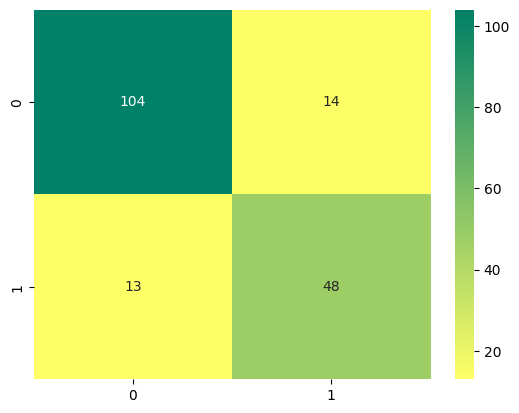

In [40]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./datasets/titanic/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

print(X_titanic_df.shape)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)
print(X_train.shape)
print(X_test.shape)
lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

In [41]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba() 결과 shape: {pred_proba.shape}')
print(f'pred_proba array에서 앞 3개만 샘플로 추출:\n{pred_proba[:3]}')

# 예측 확률 array와 예측 결괏값 array를 병합해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print(f'두 개의 class중에서 더 큰 확률을 클래스 값으로 예측:\n{pred_proba_result[:3]}')

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출:
[[0.4621693  0.5378307 ]
 [0.87879062 0.12120938]
 [0.87724729 0.12275271]]
두 개의 class중에서 더 큰 확률을 클래스 값으로 예측:
[[0.4621693  0.5378307  1.        ]
 [0.87879062 0.12120938 0.        ]
 [0.87724729 0.12275271 0.        ]]


사이킷런의 predict()는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값(위의 예제는 0.5)을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정한다. 사이킷런의 Binarizer 클래스를 이용해서 이 로직을 구현한다.

In [42]:
# 이해를 돕기위한 Binarizer 예제
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0 , 0],
    [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0, 크면 1
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


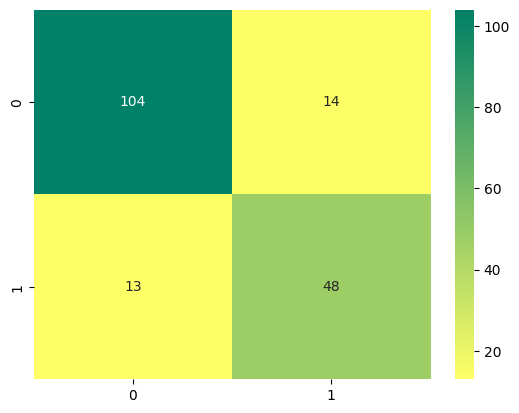

In [43]:
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)